# Heart Disease Prediction using Random Forest Algorithm

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn import linear_model, tree, ensemble
from sklearn.metrics import accuracy_score

### Importing the Dataset

In [2]:
dataframe = pd.read_csv('../data/heart_disease_dataset_UCI.csv')

In [3]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
dataframe.mean(axis = 0)

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

Correlation Matrix

In [7]:
#plt.figure(figsize=(20,10))
#sns.heatmap(dataframe.corr(), annot=True, cmap='terrain')

In [8]:
#sns.pairplot(data=dataframe)

Defining Input features as X and Y as labels

In [9]:
#dataframe.hist(figsize=(12,12), layout=(5,5));

In [10]:
#dataframe.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
#plt.show()

### Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataframe[columns_to_scale] = StandardScaler.fit_transform(dataframe[columns_to_scale])

In [12]:
X = dataframe.iloc[:,0:13]
y = dataframe.iloc[:,13]

In [13]:
X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [14]:
X = X.to_numpy()
y = y.to_numpy()

In [15]:
print(X)

[[ 0.9521966   1.          3.         ...  0.          0.
   1.        ]
 [-1.91531289  1.          2.         ...  0.          0.
   2.        ]
 [-1.47415758  0.          1.         ...  2.          0.
   2.        ]
 ...
 [ 1.50364073  1.          0.         ...  1.          2.
   3.        ]
 [ 0.29046364  1.          0.         ...  1.          1.
   3.        ]
 [ 0.29046364  0.          1.         ...  1.          1.
   2.        ]]


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=40)

In [17]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)
print('mean values', np.mean(X_train, axis = 0))

X_train- 2353
X_test- 1586
y_train- 181
y_test- 122
mean values [-0.06843204  0.6961326   0.98342541  0.00728868  0.02692875  0.13812155
  0.49171271  0.02124131  0.33149171 -0.07181972  1.43093923  0.70718232
  2.33149171]


### Decision Tree Implementation

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        57
           1       0.94      0.98      0.96        65

    accuracy                           0.96       122
   macro avg       0.96      0.96      0.96       122
weighted avg       0.96      0.96      0.96       122

Testing Accuracy for Decision Tree: 0.9590163934426229
Testing Sensitivity for Decision Tree: 0.9814814814814815
Testing Specificity for Decision Tree: 0.9411764705882353
Testing Precision for Decision Tree: 0.9298245614035088


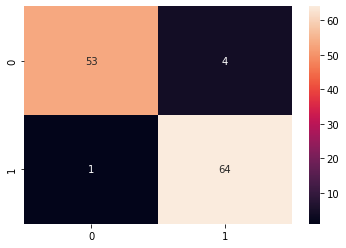

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores=cross_val_score(tree_model,X,y,cv=10,scoring='accuracy')
m = tree_model.fit(X,y)
prediction = m.predict(X_test)
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

<AxesSubplot:>

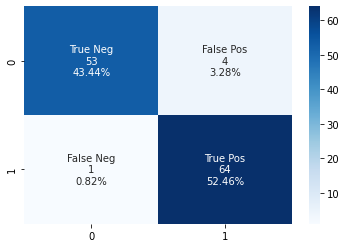

In [19]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
